In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
df_ = pd.read_csv("/content/Advertising Budget and Sales.csv", names=['Sr_no','TV_ad_budget','Radio_ad_budget','Newspaper_ad_budget','Sales'])
df_.head()

,Sr_no,TV_ad_budget,Radio_ad_budget,Newspaper_ad_budget,Sales
0,NaN,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,1.0,230.1,37.8,69.2,22.1
2,2.0,44.5,39.3,45.1,10.4
3,3.0,17.2,45.9,69.3,9.3
4,4.0,151.5,41.3,58.5,18.5


In [ ]:
df= df_[1:].copy()

In [ ]:
df.head()

,Sr_no,TV_ad_budget,Radio_ad_budget,Newspaper_ad_budget,Sales
1,1.0,230.1,37.8,69.2,22.1
2,2.0,44.5,39.3,45.1,10.4
3,3.0,17.2,45.9,69.3,9.3
4,4.0,151.5,41.3,58.5,18.5
5,5.0,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sr_no                200 non-null    float64
 1   TV_ad_budget         200 non-null    object 
 2   Radio_ad_budget      200 non-null    object 
 3   Newspaper_ad_budget  200 non-null    object 
 4   Sales                200 non-null    object 
dtypes: float64(1), object(4)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

,0
Sr_no,0
TV_ad_budget,0
Radio_ad_budget,0
Newspaper_ad_budget,0
Sales,0


In [ ]:
# drop sr_no

df.drop(columns=['Sr_no'], inplace=True)
df.head()


,TV_ad_budget,Radio_ad_budget,Newspaper_ad_budget,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   TV_ad_budget         200 non-null    object
 1   Radio_ad_budget      200 non-null    object
 2   Newspaper_ad_budget  200 non-null    object
 3   Sales                200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [ ]:
df.columns

Index(['TV_ad_budget', 'Radio_ad_budget', 'Newspaper_ad_budget', 'Sales'], dtype='object')

In [ ]:
## convert all object type column into floating number

for col in df.columns:
  df[col]=df[col].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TV_ad_budget         200 non-null    float64
 1   Radio_ad_budget      200 non-null    float64
 2   Newspaper_ad_budget  200 non-null    float64
 3   Sales                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV_ad_budget,Radio_ad_budget,Newspaper_ad_budget,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Univariate Analysis

In [ ]:
df.isnull().sum()

,0
TV_ad_budget,0
Radio_ad_budget,0
Newspaper_ad_budget,0
Sales,0


Text(0.5, 1.0, 'Sales')

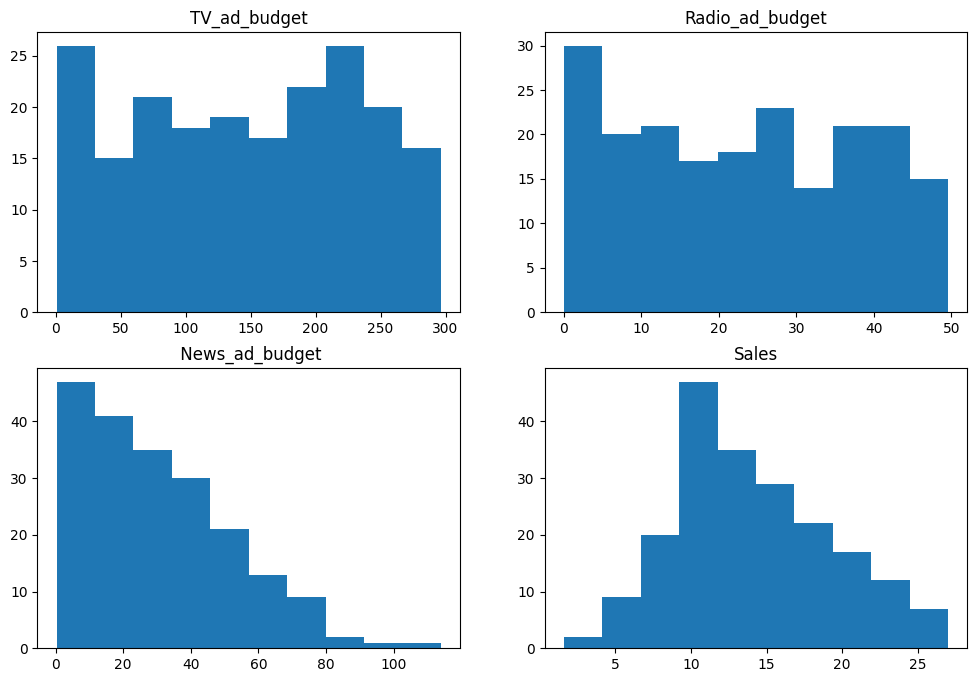

In [ ]:
# check the distiburion of all column using histogram

fig , axes= plt.subplots(2,2 , figsize=(12,8))


axes[0,0].hist(df['TV_ad_budget'])
axes[0,0].set_title("TV_ad_budget")

axes[0,1].hist(df['Radio_ad_budget'])
axes[0,1].set_title("Radio_ad_budget")

axes[1,0].hist(df['Newspaper_ad_budget'])
axes[1,0].set_title(" News_ad_budget")

axes[1,1].hist(df['Sales'])
axes[1,1].set_title("Sales")


Text(0.5, 1.0, 'Sales')

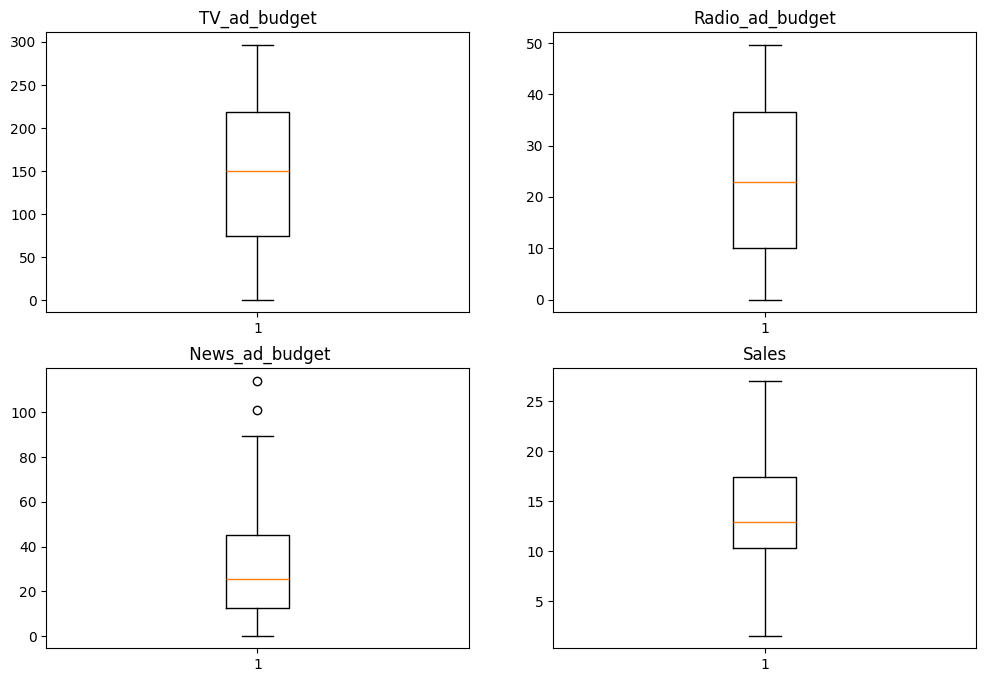

In [ ]:
fig , axes= plt.subplots(2,2 , figsize=(12,8))


axes[0,0].boxplot(df['TV_ad_budget'])
axes[0,0].set_title("TV_ad_budget")

axes[0,1].boxplot(df['Radio_ad_budget'])
axes[0,1].set_title("Radio_ad_budget")

axes[1,0].boxplot(df['Newspaper_ad_budget'])
axes[1,0].set_title(" News_ad_budget")

axes[1,1].boxplot(df['Sales'])
axes[1,1].set_title("Sales")

In [ ]:
df.columns

Index(['TV_ad_budget', 'Radio_ad_budget', 'Newspaper_ad_budget', 'Sales'], dtype='object')

In [ ]:
## remove outlier from News_ad_budget column :

# Q1 = df['Newspaper_ad_budget'].quantile(0.25)
# Q3 = df['Newspaper_ad_budget'].quantile(0.75)
# IQR = Q3 - Q1


# lower_bound = Q1 - (1.5 * IQR)
# upper_bound = Q3 + (1.5 * IQR)

# # Filter out outliers
# df['Newspaper_ad_budget_new'] = df[(df['Newspaper_ad_budget'] >= lower_bound) & (df['Newspaper_ad_budget'] <= upper_bound)]


Bivariate Analysis

Text(0.5, 1.0, 'Sales over News_ad_budget')

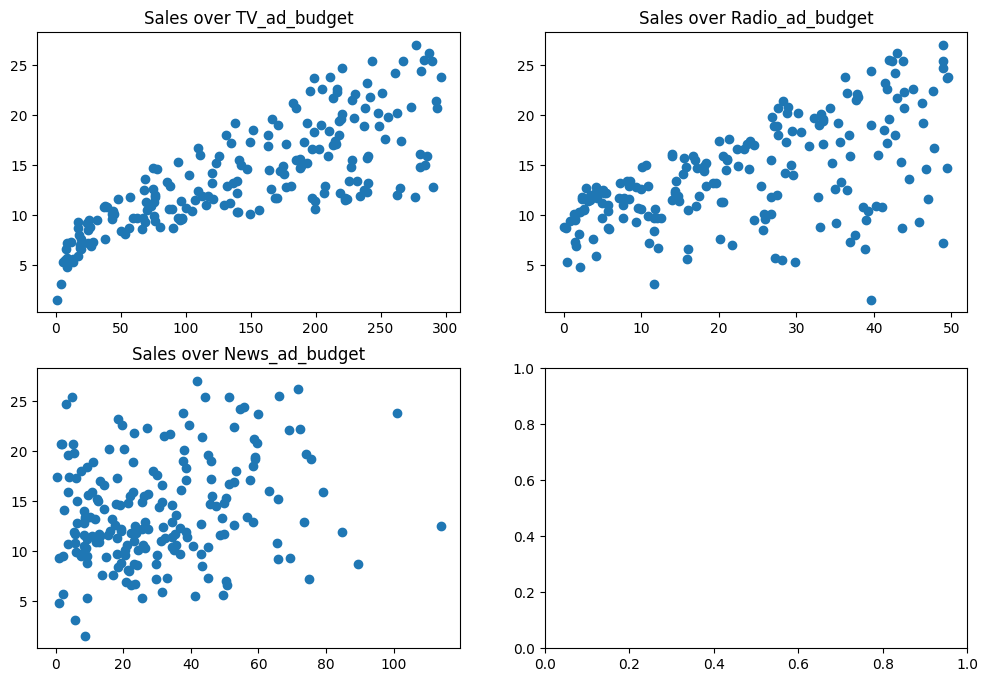

In [ ]:
fig , axes= plt.subplots(2,2 , figsize=(12,8))

axes[0,0].scatter(df['TV_ad_budget'], df['Sales'])
axes[0,0].set_title("Sales over TV_ad_budget")

axes[0,1].scatter(df['Radio_ad_budget'], df['Sales'])
axes[0,1].set_title("Sales over Radio_ad_budget")

axes[1,0].scatter(df['Newspaper_ad_budget'], df['Sales'])
axes[1,0].set_title("Sales over News_ad_budget")


Modelling

In [ ]:
X=df.drop(columns=['Sales'])
X.head()

,TV_ad_budget,Radio_ad_budget,Newspaper_ad_budget
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [ ]:
y=df['Sales']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split( X,y ,test_size=0.25, random_state=42)
X_test.shape

(50, 3)

In [ ]:
y_train.shape

(150,)

In [ ]:
y_test.shape

(50,)

In [ ]:
sc=StandardScaler()

X_train_sc= sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)



In [ ]:
lr_model = LinearRegression()

lr_model.fit(X_train_sc, y_train)

LinearRegression()

In [ ]:
y_pred_lr=lr_model.predict(X_test_sc)
y_pred_lr_train=lr_model.predict(X_train_sc)

In [ ]:
# Mean_squared_error
print("Mean_squared_error  Score:",mean_squared_error(y_pred_lr,y_test))

Mean_squared_error  Score: 2.88002373009419


In [ ]:
# Mean_absolute_error
print("Mean_absolute_error  Score:",mean_absolute_error(y_pred_lr,y_test))

Mean_absolute_error  Score: 1.4023124989385067


In [ ]:
# r2_score

print("R2 Score for  Training data :",r2_score(y_pred_lr_train,y_train)*100)
print("R2 Score for testing data :",r2_score(y_pred_lr,y_test)*100)

R2 Score for  Training data : 88.47308591551801
R2 Score for testing data : 88.43196200174289


In [ ]:
dt_model= DecisionTreeRegressor( criterion="squared_error")

dt_model.fit(X_train_sc,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dt= dt_model.predict(X_test_sc)

In [ ]:
# Mean_squared_error
print("Mean_squared_error  Score:",mean_squared_error(y_pred_dt,y_test))

# Mean_absolute_error
print("Mean_absolute_error  Score:",mean_absolute_error(y_pred_dt,y_test))

# r2_score
print("R2 Score:",r2_score(y_pred_dt,y_test)*100)

Mean_squared_error  Score: 1.9106000000000003
Mean_absolute_error  Score: 0.9700000000000003
R2 Score: 93.10732557161289


In [ ]:
rfr_model= RandomForestRegressor( )

rfr_model.fit(X_train_sc,y_train)

RandomForestRegressor()

In [ ]:
y_pred_rfr=rfr_model.predict(X_test_sc)

In [ ]:
# Mean_squared_error
print("Mean_squared_error  Score:",mean_squared_error(y_pred_rfr,y_test))

# Mean_absolute_error
print("Mean_absolute_error  Score:",mean_absolute_error(y_pred_rfr,y_test))

# r2_score
print("R2 Score:",r2_score(y_pred_rfr,y_test)*100)

Mean_squared_error  Score: 0.4735752200000016
Mean_absolute_error  Score: 0.5464999999999997
R2 Score: 98.15486147160183


In [ ]:

parma_grid= {
              'max_depth':[None, 10, 20,30],
              'min_samples_split':[2,3,4,9],
              'min_samples_leaf':[1,2,5,10,15],
              # 'max_features':['sqrt', 'log2', None],
              'bootstrap':[True,False]

}

In [ ]:
# (estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search = GridSearchCV( estimator= rfr_model, param_grid=parma_grid, cv=10, n_jobs=-1)

In [ ]:
grid_search.fit(X_train_sc,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 5, 10, 15],
                         'min_samples_split': [2, 3, 4, 9]})

In [ ]:
print(grid_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [ ]:
rfr_model= RandomForestRegressor(
     bootstrap = True,
     max_depth =None,
     min_samples_leaf=  1,
     min_samples_split = 3
 )

rfr_model.fit(X_train_sc,y_train)

RandomForestRegressor(min_samples_split=3)

In [ ]:
y_pred_rfr=rfr_model.predict(X_test_sc)

In [ ]:
# Mean_squared_error
print("Mean_squared_error  Score:",mean_squared_error(y_pred_rfr,y_test))

# Mean_absolute_error
print("Mean_absolute_error  Score:",mean_absolute_error(y_pred_rfr,y_test))

# r2_score
print("R2 Score:",r2_score(y_pred_rfr,y_test)*100)

Mean_squared_error  Score: 0.5416449020061604
Mean_absolute_error  Score: 0.6068934761904761
R2 Score: 97.9045182732451
